In [166]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
mu.update('dhlab_v2', silent = True)
import pandas as pd
import dhlab_v2 as d2

In [167]:
mu.css('css.css')

# DH-lab - Nasjonalbiblioteket

DH - Digital Humanioria: tolkning og analyse av tekst, bilder og audio

Team fra språkbanken
* Lars
* Yngvil
* Magnus
* Andre
* Ingerid

# For hvem?

Alle som vil undersøke egenskaper ved tekster på et eller annet nivå.

Et par doktorgrader, noen bøker og flere artikler.


https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

# Hva

En separat indeksering av NB-digital - bøker, tidsskrift og aviser


# API

Unngår at hele teksten distribueres, bare egenskaper som ikke utfordrer opphavsrett




# FAIR

Findable Accessible Interoperability Reusability

# Fokus

Ord, fraser, tekst, dokument, klasser av dokument

# NB N-gram

Objekter for tolkning

<AxesSubplot:>

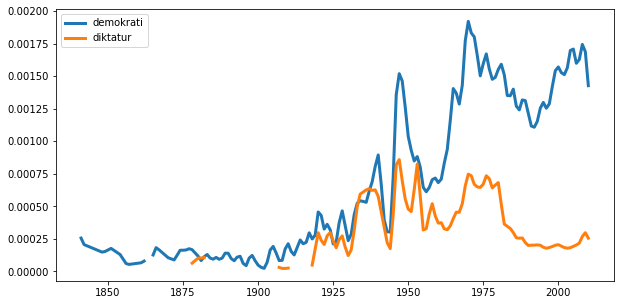

In [168]:
nb.nb_ngram('demokrati, diktatur').sort_index().plot(figsize = (10, 5), lw = 3)

# Bygg et korpus - en samling av tekster


In [208]:
corpus = nb.book_corpus( ddk = "796.9%", period = (1960, 1990), limit = 50, lang = 'nob')

In [209]:
%%time
conc = d2.concordance(urns=  ["URN:NBN:no-nb_digibok_" + str(u) for u in list(corpus.urn)], words= "NEAR(verdens* kampe*, 30)")
conc.sample(min(len(conc), 10)).style

Wall time: 550 ms


,docid,urn,conc
4,100208727,URN:NBN:no-nb_digibok_2014060408220,"... På minussiden måtte jeg føre opp nederlagene i kampen om Europa- og Verdensmesterskapet . Når jeg så slik på det , syntes jeg slett ikke det var..."
1,100573914,URN:NBN:no-nb_digibok_2007071900082,"... Den bør være optimal , for når vi er i Norge i to uker mellom f em-lands kampen og verdensmesterskapet , da blir det til at..."
5,100208727,URN:NBN:no-nb_digibok_2014060408220,"... For nå var det seks mot én , og da kunne det bli litt for mye på en gang for en frisk 23 - åring fra Kampen..."
10,100002548,URN:NBN:no-nb_digibok_2007031401008,... Ivlen det grenser til det rene tOv nar en kei dvdel — Kampen ker i Oslo — samler seF ved midnattBtider i 10 - 15 kuldegrader kor a...
3,100208727,URN:NBN:no-nb_digibok_2014060408220,"... Da dette løpet var ferdig , var det tydelig at kampen om mesterskapet ville stå mellom Grisjin , tredjemann fra Verdensmesterskapet i Oslo , og meg . Han hadde..."
8,100015623,URN:NBN:no-nb_digibok_2007060801022,"... inn i verdenseliten , i guttedrømmen . Det var som a ta av seg uvisshetens ryggsekk . Nå visste jeg at jeg kunne ta kampen opp med hvem..."
9,100002548,URN:NBN:no-nb_digibok_2007031401008,"minussiden måtte jeg føre opp nederlagene i kampen om Europa- og Verdensmesterskapet . Når jeg så slik på det , syntes jeg slett ikke det var så..."
11,100002548,URN:NBN:no-nb_digibok_2007031401008,"... Da dette løpet var ferdig , var det tydelig at kampen om mesterskapet ville stå mellom Grisjin , tredjemann fra Verdensmesterskapet i Oslo , og meg . Han hadde..."
0,100105158,URN:NBN:no-nb_digibok_2012071806119,"... I den jevne kampen med verdenseliten kunne ingen kreve at han skulle gå helt til topps , mente han ."
6,100208727,URN:NBN:no-nb_digibok_2014060408220,... Men det grenser til det rene tøv når en hel bydel - Kampen her i Oslo - samler seg ved midnattstider i 10 - 15 kuldegrader for å...


In [210]:
agg = nb.get_aggregated_corpus([x for x in corpus.urn])

In [211]:
tot = d2.totals(200000)

In [212]:
agg.columns =  ['counts']

In [213]:
agg.head()

,counts
",",136034
.,94576
og,45392
i,42239
det,25465


In [214]:
assoc = pd.DataFrame((agg.counts/agg.counts.sum())/(tot.freq/tot.freq.sum()), columns =  ['relevans']).sort_values(by = 'relevans', ascending = False)
assoc.head(20)

,relevans
Skiklubb,2735.452295
Skiforeningen,1664.463651
Skiklub,1243.339408
Skilag,1215.650469
Grøttumsbråten,967.173232
Slora,957.435088
Bergendahl,815.172905
Grøttum,605.721855
Sportsklubb,564.331041
pucken,517.975623


In [215]:
words = list(assoc[assoc.relevans > 20].index)

'Skiklubb, Skiforeningen, Skiklub, Skilag, Grøttumsbråten, Slora, Bergendahl, Grøttum, Sportsklubb, pucken, Hjallis, Woxen, Svartor, SOV, Skimt, skien, SIF, smøringen, Ready, Njård, IL, Ballklubb, Heming, Birkebeinerrennet, Kees, Skiforbundet, Heradsbygd, i.l, Aunli, Ballangrud, Seiersten, langrennsløper, Jømna, Skiforeningens, skøytesporten, Flatin, Gjelleråsen, BSK, Mesnalien, Squaw, Røa, Skimuseet, Sapporo, Klammer, mannslag, Holmenkollrennet, Nanset, Davos, Bul, Schenk, klister, Nordbygda, frasparket, langrennsløpere, Ullevålseter, Drafn, turrenn, mesterskapene, Bærums, femmila, Stabæk, skrens, If, Sørkedalen, verdensmesterskapet, langrennet, Rival, fraspark, startnummer, Sigge, Jårvinen, Sørskogbygda, Ard, rennene, målvakten, Lillehagen, løperne, IF, Haugsbygd, Åsmarka, B-klassen, skøyteløpere, sprinten, distansene, Skiforbund, Årvoll, Lismarka, Lahti, Veldre, Damsleth, Cortina, skiene, Placid, Høybråten, Dist, Ellefsæter, kilometeren, Hallgeir, rennet, Sportsklubben, Strindheim, 

In [216]:
dtm = pd.concat([nb.frame(nb.get_freq(u, top = 0, cutoff = 0), str(u)) for u in nb.pure_urn(corpus)[:20]], axis = 1)

In [217]:
dtm.loc['skøyter']

2013102508035    42.0
2007111301030     NaN
2011111508022     NaN
2012071806119     NaN
2012112305053     NaN
2014101508039     1.0
2007073004016     8.0
2013030506242     NaN
2007060801022     NaN
2016062208207     NaN
2013022606043     NaN
2015051308316     1.0
2013013108156     1.0
2007071900082    25.0
2013061408171     1.0
2009081301138    25.0
2007091101035     NaN
2014060408220    22.0
2014030408190     NaN
2015012208057     NaN
Name: skøyter, dtype: float64

In [218]:
dtm_key = pd.concat([((dtm[x]/dtm[x].sum())/(tot.freq/tot.freq.sum())).sort_values(ascending=False).head(150) for x in dtm], axis = 1)

In [219]:
dtm_key.columns = dtm.columns

In [220]:
dtm_key.sort_values(by=dtm_key.columns[10], ascending = False).head(10).fillna(0).style.background_gradient(axis = 1)

,2013102508035,2007111301030,2011111508022,2012071806119,2012112305053,2014101508039,2007073004016,2013030506242,2007060801022,2016062208207,2013022606043,2015051308316,2013013108156,2007071900082,2013061408171,2009081301138,2007091101035,2014060408220,2014030408190,2015012208057
bivuakk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2532.409845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bekledning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.030025,0.000000,0.000000,1951.159619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skavlen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1668.502299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snøhule,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1305.584193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
anorakken,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,978.382361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
overlæret,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,909.468702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kunstfiber,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,881.080662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sovepose,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,768.539266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skredfare,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,764.683718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snøens,0.000000,0.000000,0.000000,0.000000,517.411021,0.000000,0.000000,0.000000,0.000000,0.000000,733.998176,0.000000,0.000000,0.000000,1498.840948,0.000000,0.000000,0.000000,0.000000,0.000000


In [221]:
graph = dtm_key.fillna(0).dot(dtm_key.fillna(0).transpose())

In [222]:
from math import log
graph.replace(0,0.1).fillna(0.1).applymap(log).head(10).applymap(lambda x: round(x,2))

,Storholt,Gilmore,Mueller,Placid,Coates,distansene,Kleine,Boucher,Heiden,Woods,...,etappe,knæme,italieneren,etappen,Egebergs,Karesuando,Loren,elleville,vinterfrakk,stigningen
Storholt,16.68,15.87,15.86,15.79,15.65,15.62,15.58,15.49,15.32,15.27,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Gilmore,15.87,15.07,15.06,14.99,14.85,14.82,14.78,14.69,14.51,14.47,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Mueller,15.86,15.06,15.05,14.98,14.84,14.80,14.77,14.68,14.50,14.46,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Placid,15.79,14.99,14.98,15.87,14.77,15.15,14.69,14.60,14.43,14.39,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Coates,15.65,14.85,14.84,14.77,14.63,14.59,14.55,14.46,14.29,14.25,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
distansene,15.62,14.82,14.80,15.15,14.59,15.38,14.52,14.43,14.26,14.22,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Kleine,15.58,14.78,14.77,14.69,14.55,14.52,14.48,14.39,14.22,14.18,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Boucher,15.49,14.69,14.68,14.60,14.46,14.43,14.39,14.30,14.13,14.09,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Heiden,15.32,14.51,14.50,14.43,14.29,14.26,14.22,14.13,13.95,13.91,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3
Woods,15.27,14.47,14.46,14.39,14.25,14.22,14.18,14.09,13.91,13.87,...,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3,-2.3


In [223]:
import networkx as nx
G = nx.from_pandas_adjacency(graph)

In [224]:
import dhlab.graph_networkx_louvain as gnl

In [225]:
list(G.edges(data=True))[:10]

[('Storholt', 'Storholt', {'weight': 17457927.97041932}),
 ('Storholt', 'Gilmore', {'weight': 7839377.9135151515}),
 ('Storholt', 'Mueller', {'weight': 7743519.31643446}),
 ('Storholt', 'Placid', {'weight': 7209800.874787026}),
 ('Storholt', 'Coates', {'weight': 6265254.732336347}),
 ('Storholt', 'distansene', {'weight': 6059289.285721892}),
 ('Storholt', 'Kleine', {'weight': 5827945.651173022}),
 ('Storholt', 'Boucher', {'weight': 5327758.726373136}),
 ('Storholt', 'Heiden', {'weight': 4479968.242526219}),
 ('Storholt', 'Woods', {'weight': 4296531.973558288})]

In [226]:
Gf = nx.from_edgelist([(u,v, e) for u,v,e in G.edges(data=True) if e['weight'] > 1238118])

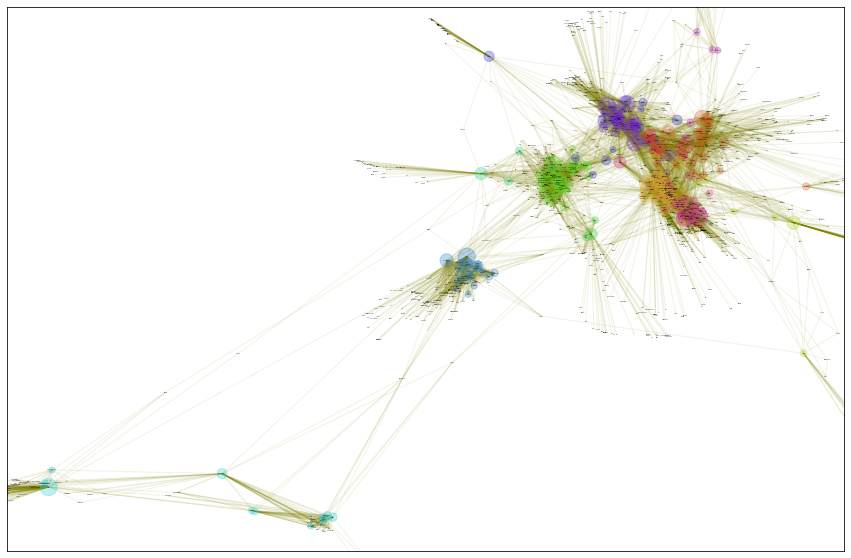

In [230]:
gnl.show_graph(Gf, spread = 0.2, fontsize = 1)

In [228]:
gnl.show_communities(Gf)

Storholt-Gilmore :  Storholt, Gilmore, Mueller, Coates, Kleine, Boucher, Savalen, Beth, Heiden, Woods, rander, Carroll, Madison, Hilbert, cow, lagkameratene, Milwaukee, fjerdemann, juniorene, andreplass, metre, Colin, 38.6, Leah, Ata, snøfonna, trofeet, Mike, vekkerklokken, jogget, treningsprogrammet, joggetur, metrene, Vries, starteren, Bislett, skøyter, ishockey, baseball, 5000., Sandler, Stensen, femteplass, Allis

Ballangrud-Staksrud :  Ballangrud, Staksrud, Thunberg, verdensmesterskapet, Sportsmanden, norgesmesterskapet, Davos, Placid, europamester, toppform, skøytesporten, mesterskapene, distansene, skøyten, verdensmesteren, meteren, Clas, skøyteløp, skøyteløper, verdensmesterskap, skøyteløpere, Løperne, løperne, massør, verdensrekord, revansje, annenplass, 8.24, samløp, skøytene, verdensrekorder, målstreken, gullmedaljer, ISU, vasstrukne, 8.37, 8.42, 8.26, fellesstart, 8.38, onnearbeid, skøytebanen, Mathisens, 8.23, løpene, hellinga, Wangberg, Nøsen, idrettslivet, skøy, hurtiglø